In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [132]:
ruter_data = pd.read_csv('/Users/zulfeqarshiorzadeh/Desktop/AI-LAB/Assignment/Ruter-data.csv', sep=';')
ruter_data.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


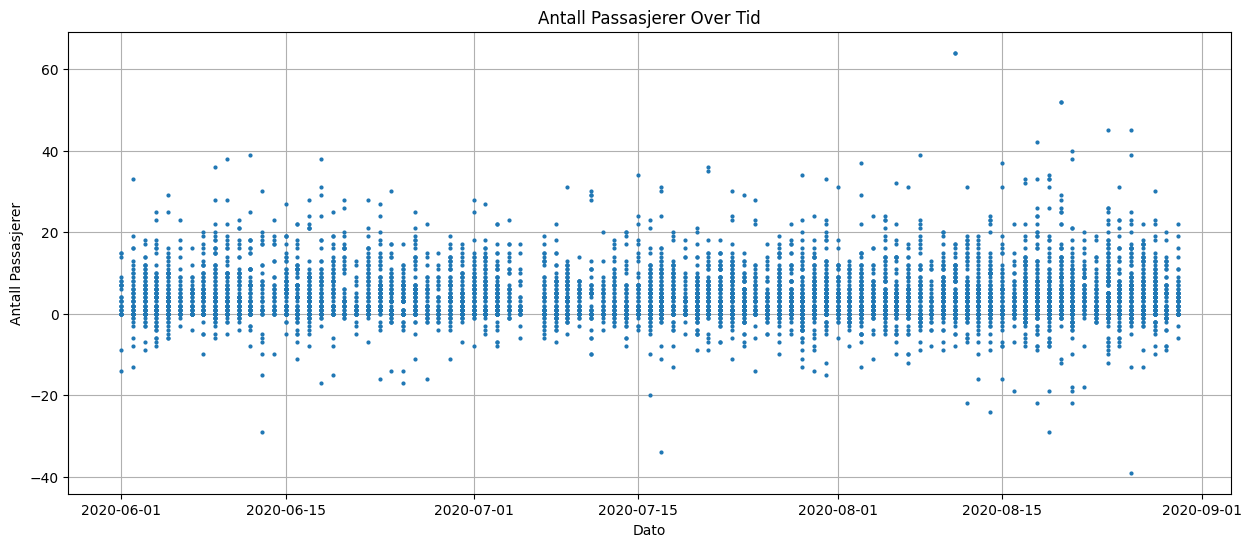

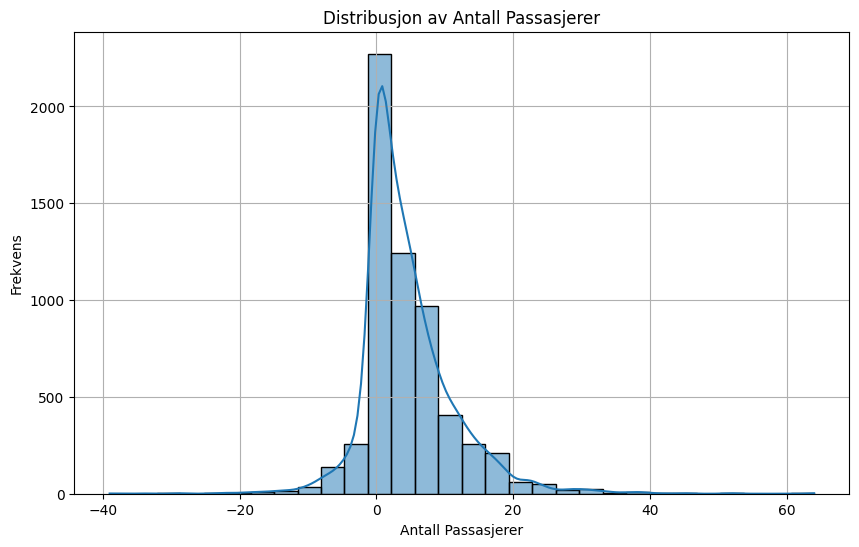

In [133]:

# Convert 'Dato' column to datetime and handle missing values
ruter_data['Dato'] = pd.to_datetime(ruter_data['Dato'], format='%d/%m/%Y', errors='coerce')
ruter_data.dropna(subset=['Dato'], inplace=True)

# Plotting the number of passengers over time
plt.figure(figsize=(15, 6))
plt.plot(ruter_data['Dato'], ruter_data['Passasjerer_Ombord'], marker='o', linestyle='', ms=2)
plt.title('Antall Passasjerer Over Tid')
plt.xlabel('Dato')
plt.ylabel('Antall Passasjerer')
plt.grid(True)
plt.show()

# Histogram of the number of passengers
plt.figure(figsize=(10, 6))
sns.histplot(ruter_data['Passasjerer_Ombord'], bins=30, kde=True)
plt.title('Distribusjon av Antall Passasjerer')
plt.xlabel('Antall Passasjerer')
plt.ylabel('Frekvens')
plt.grid(True)
plt.show()


In [134]:
# Kolonner som skal fjernes
columns_to_drop = [
    'TurId', 'Fylke', 'Område', 'Kommune', 'Holdeplass_Fra', 'Holdeplass_Til',
    'Linjetype', 'Linjefylke', 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', 
    'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra', 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra',
    'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra', 'Kjøretøy_Kapasitet', 'Linjeretning'
]

# Filtrere datasettet først
df_filtered = ruter_data[ruter_data['Linjenavn'] == '150']

# Gjør negative passasjertall positive
df_filtered['Passasjerer_Ombord'] = df_filtered['Passasjerer_Ombord'].abs()

# Fjerne unødvendige kolonner
df_filtered = df_filtered.drop(columns=columns_to_drop + ['Linjenavn'])

# Vis de første 10 radene
df_filtered.head()




/var/folders/17/3fytsvds33x_ld4yxfdtt_3c0000gn/T/ipykernel_11346/559274724.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Passasjerer_Ombord'] = df_filtered['Passasjerer_Ombord'].abs()


,Dato,Passasjerer_Ombord
0,2020-08-10,5
1,2020-08-15,5
2,2020-08-03,6
3,2020-07-27,10
4,2020-08-27,10


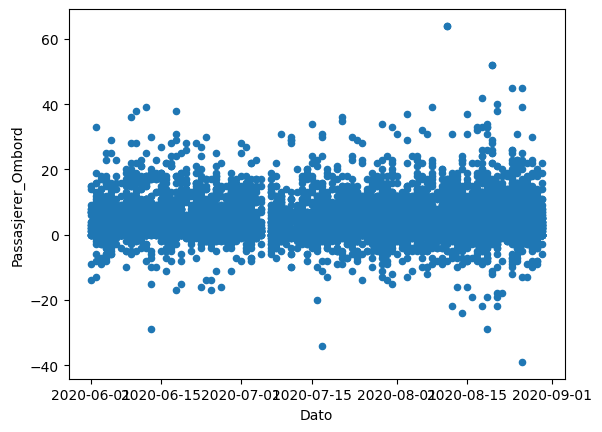

In [135]:
ruter_data.plot(kind = 'scatter', x = 'Dato', y = 'Passasjerer_Ombord')
plt.show()

In [136]:
#plotten viser at vi har negativ tall der i vår plott derfor må vi fikset på det
df_filtered['Passasjerer_Ombord'] = df_filtered['Passasjerer_Ombord'].abs()

# Fjerne unødvendige kolonner
df_filtered = df_filtered.drop(columns=columns_to_drop + ['Linjenavn'], errors='ignore')

# Konverter 'Dato' til et format som kan plottes (f.eks. ordinale tall)
df_filtered['Dato'] = pd.to_datetime(df_filtered['Dato']).apply(lambda x: x.toordinal())

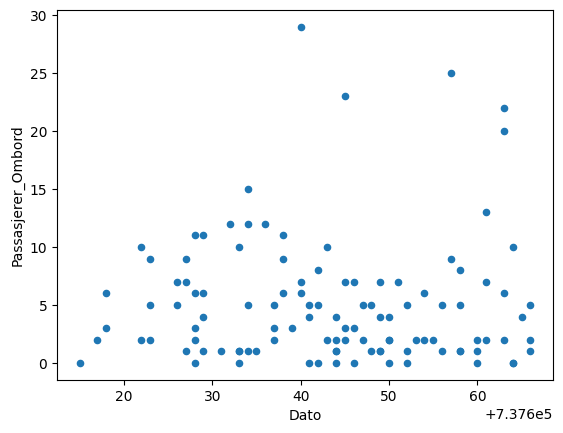

In [137]:
df_filtered.plot(kind='scatter', x='Dato', y='Passasjerer_Ombord')
plt.show()

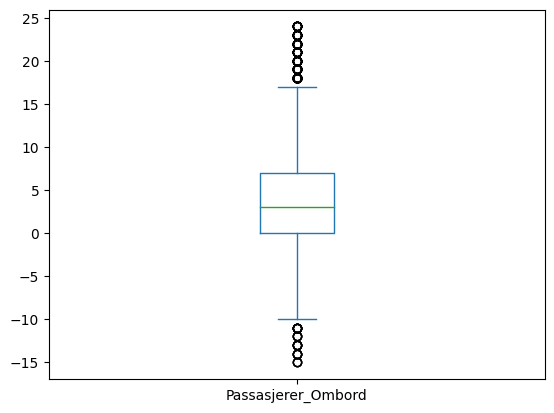

In [138]:
#Her jeg vil bruke z-score metode for å fjerne outliers 

# Beregner Z-scores for 'Passasjerer_Ombord'-kolonnen
z_scores = np.abs((ruter_data['Passasjerer_Ombord'] - ruter_data['Passasjerer_Ombord'].mean()) / ruter_data['Passasjerer_Ombord'].std())

# Beholder kun data med Z-scores mindre enn 3 (kan justeres avhengig av ditt behov)
df_cleaned = ruter_data[z_scores < 3]

# Plotter boksplott for den rensede dataen
df_cleaned['Passasjerer_Ombord'].plot.box()
plt.show()


In [139]:
ruter_data['Dato'] = pd.to_datetime(ruter_data['Dato'])
start_date = ruter_data['Dato'].min()
ruter_data['Dager'] = (ruter_data['Dato'] - start_date).dt.days  

In [140]:
#nå vi skal lage variabler
x = pd.DataFrame(ruter_data['Dager'])
y = pd.DataFrame(ruter_data['Passasjerer_Ombord'])

# Deler datasettet i et treningssett og et testsett
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [141]:
#deretter vi skal lage linjær regresjon modell
# Oppretter og trener lineær regresjonsmodell
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [142]:
# Lager prediksjoner
y_pred = linear_regressor.predict(x_test)

# Evaluering av modellen
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 48.77684716762754


In [143]:
r2_score = linear_regressor.score(x_test, y_test)
print(f"R^2 Score: {r2_score * 100} %")

R^2 Score: -0.16280668170149948 %


CHOICE OF ALGORITHM:

Given the task's requirement to predict the number of passengers on a specific date, I identified this as a regression problem. After considering the dataset and the need for simplicity in the solution, I chose linear regression as the most suitable algorithm. Linear regression provides a straightforward way to understand the relationship between dates and number of passengers, and is efficient for this type of dataset.